In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
import xgboost as xgb

## Text Detection Features

In [2]:
text_detection_features = pd.read_csv("merged-text-features.csv").drop(columns=["Total words_x", "Average words per sentence_x"]).set_index('Id')

X = text_detection_features.drop(columns=['Label'])
y = text_detection_features['Label']

standard_scale = StandardScaler()
X = standard_scale.fit_transform(X)

label_encoder = LabelEncoder()
# 0 = Chatgpt | 1 = Human
y = label_encoder.fit_transform(y)

X_shuffled, y_shuffled = shuffle (X, y, random_state=42)


X_without_flesch = text_detection_features.drop(columns=['Label', 'Flesch-kincaid grade level score'])
X_without_flesch = standard_scale.fit_transform(X_without_flesch)

X_shuffled_no_flesch, y_shuffled_no_flesch = shuffle (X_without_flesch, y, random_state=42)

In [3]:
# text_detection_features

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Extracted text-features

### Logistic Regression

In [5]:
lr = LogisticRegression()
print('Extracted text-features')
print(f'Logistic Regression Accuracy: {np.mean(cross_val_score(lr, X_shuffled, y_shuffled, cv=5, scoring="accuracy")):.4f}')
print(f'Logistic Regression Precision: {np.mean(cross_val_score(lr, X_shuffled, y_shuffled, cv=5, scoring="precision")):.4f}')
print(f'Logistic Regression Recall: {np.mean(cross_val_score(lr, X_shuffled, y_shuffled, cv=5, scoring="recall")):.4f}')
print(f'Logistic Regression F1: {np.mean(cross_val_score(lr, X_shuffled, y_shuffled, cv=5, scoring="f1")):.4f}')

print('\nWithout Flesch-kincaid')
print(f'Logistic Regression Accuracy: {np.mean(cross_val_score(lr, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="accuracy")):.4f}')
print(f'Logistic Regression Precision: {np.mean(cross_val_score(lr, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="precision")):.4f}')
print(f'Logistic Regression Recall: {np.mean(cross_val_score(lr, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="recall")):.4f}')
print(f'Logistic Regression F1: {np.mean(cross_val_score(lr, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="f1")):.4f}')

Extracted text-features
Logistic Regression Accuracy: 0.9048
Logistic Regression Precision: 0.9240
Logistic Regression Recall: 0.8818
Logistic Regression F1: 0.9011

Without Flesch-kincaid
Logistic Regression Accuracy: 0.9048
Logistic Regression Precision: 0.9240
Logistic Regression Recall: 0.8818
Logistic Regression F1: 0.9011


### XGBoost

In [6]:
xgBoost = xgb.XGBClassifier()

print('Extracted text-features')
print(f'XGBoost Accuracy: {np.mean(cross_val_score(xgBoost, X_shuffled, y_shuffled, cv=5, scoring="accuracy")):.4f}')
print(f'XGBoost Precision: {np.mean(cross_val_score(xgBoost, X_shuffled, y_shuffled, cv=5, scoring="precision")):.4f}')
print(f'XGBoost Recall: {np.mean(cross_val_score(xgBoost, X_shuffled, y_shuffled, cv=5, scoring="recall")):.4f}')
print(f'XGBoost F1: {np.mean(cross_val_score(xgBoost, X_shuffled, y_shuffled, cv=5, scoring="f1")):.4f}')

print('\nWithout Flesch-kincaid')
print(f'XGBoost Accuracy: {np.mean(cross_val_score(xgBoost, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="accuracy")):.4f}')
print(f'XGBoost Precision: {np.mean(cross_val_score(xgBoost, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="precision")):.4f}')
print(f'XGBoost Recall: {np.mean(cross_val_score(xgBoost, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="recall")):.4f}')
print(f'XGBoost F1: {np.mean(cross_val_score(xgBoost, X_shuffled_no_flesch, y_shuffled_no_flesch, cv=5, scoring="f1")):.4f}')

Extracted text-features
XGBoost Accuracy: 0.9128
XGBoost Precision: 0.9181
XGBoost Recall: 0.9126
XGBoost F1: 0.9130

Without Flesch-kincaid
XGBoost Accuracy: 0.9047
XGBoost Precision: 0.9214
XGBoost Recall: 0.8889
XGBoost F1: 0.9027


## TFIDF features

In [7]:
tfidf_features = pd.read_csv("TFIDF-features.csv").set_index('Id')

X_tfidf = tfidf_features.drop(columns=['Label'])
y_tfidf = tfidf_features['Label']

standard_scale = StandardScaler()
X_tfidf = standard_scale.fit_transform(X_tfidf)

label_encoder = LabelEncoder()
# 0 = Chatgpt | 1 = Human
y_tfidf = label_encoder.fit_transform(y_tfidf)

X_shuffled_tfidf, y_shuffled_tfidf = shuffle (X_tfidf, y_tfidf, random_state=42)

### Logistic Regression

In [8]:
lr = LogisticRegression()
print(f'TFIDF')
print(f'Logistic Regression Accuracy: {np.mean(cross_val_score(lr, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="accuracy")):.4f}')
print(f'Logistic Regression Precision: {np.mean(cross_val_score(lr, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="precision")):.4f}')
print(f'Logistic Regression Recall: {np.mean(cross_val_score(lr, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="recall")):.4f}')
print(f'Logistic Regression F1: {np.mean(cross_val_score(lr, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="f1")):.4f}')


TFIDF
Logistic Regression Accuracy: 0.9522
Logistic Regression Precision: 0.9913
Logistic Regression Recall: 0.9126
Logistic Regression F1: 0.9490


### XGBoost

In [9]:
xgBoost = xgb.XGBClassifier()
# xgBoost.fit(X_train, y_train)
print(f'TFIDF')
print(f'XGBoost Accuracy: {np.mean(cross_val_score(xgBoost, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="accuracy")):.4f}')
print(f'XGBoost Precision: {np.mean(cross_val_score(xgBoost, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="precision")):.4f}')
print(f'XGBoost Recall: {np.mean(cross_val_score(xgBoost, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="recall")):.4f}')
print(f'XGBoost F1: {np.mean(cross_val_score(xgBoost, X_shuffled_tfidf, y_shuffled_tfidf, cv=5, scoring="f1")):.4f}')


TFIDF
XGBoost Accuracy: 0.9205
XGBoost Precision: 0.9355
XGBoost Recall: 0.9040
XGBoost F1: 0.9186


## PCA Feature analysis

In [10]:
X.shape[1]

238

In [11]:
pca = PCA(n_components=X.shape[1])
pca_fit = pca.fit(X)

data = text_detection_features.drop(columns=['Label'])
features = data.columns

n_pcs = pca_fit.components_.shape[0]

test = pd.DataFrame(np.abs(pca_fit.components_[0]), features).transpose()
test = test.max(axis=0).sort_values(ascending=False)[:20]/test.max(axis=0).sort_values(ascending=False)[0]
test = pd.DataFrame(test).transpose()

<Axes: title={'center': 'V comp'}>

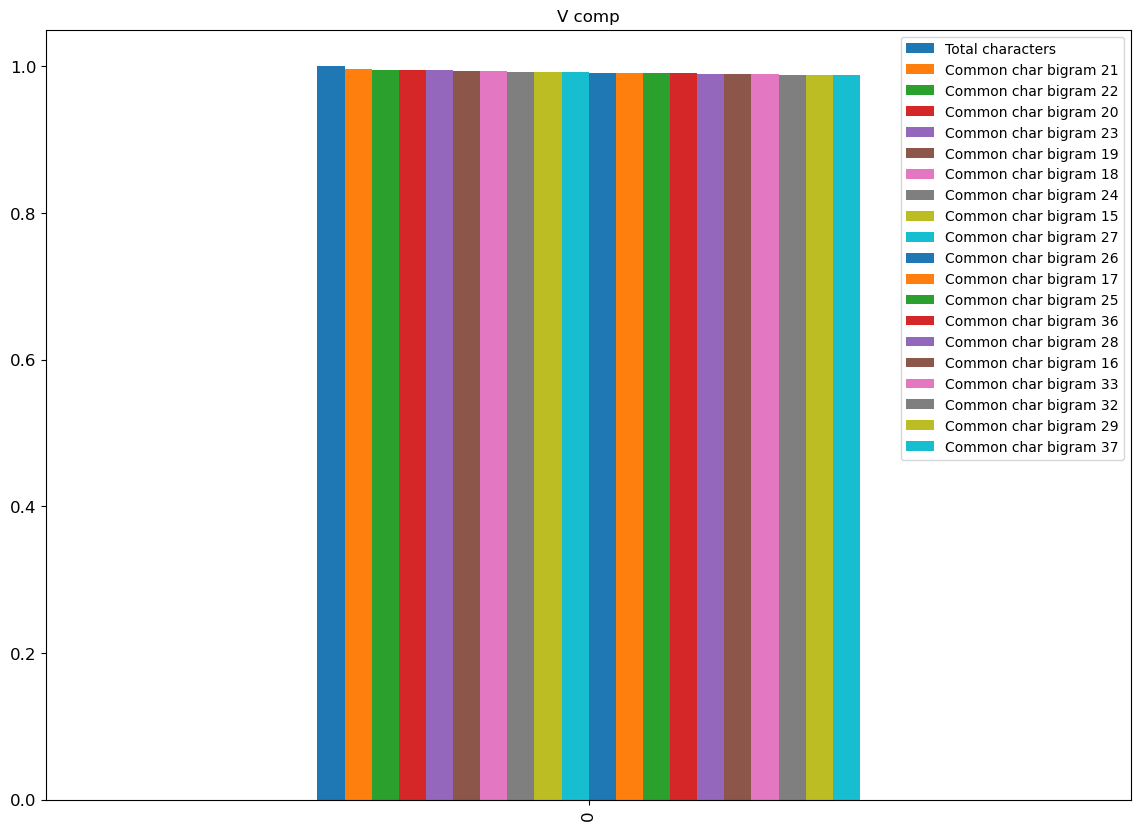

In [17]:
test.plot(kind='bar', title ="V comp", figsize=(14, 10), legend=True, fontsize=12)

In [16]:
# Extracting best features based on PCA
most_important = [np.abs(pca_fit.components_[i]).argmax() for i in range(21)]
most_important_values = [np.abs(pca_fit.components_[i]).max() for i in range(21)]
most_important_names = [features[most_important[i]] for i in range(21)]
dic = {most_important_names[i]: most_important_values[i] for i in range(21)}
df = pd.DataFrame(dic.items())
df[1] = df[1]/df[1].max()
# df

<Axes: title={'center': 'V comp'}, xlabel='0'>

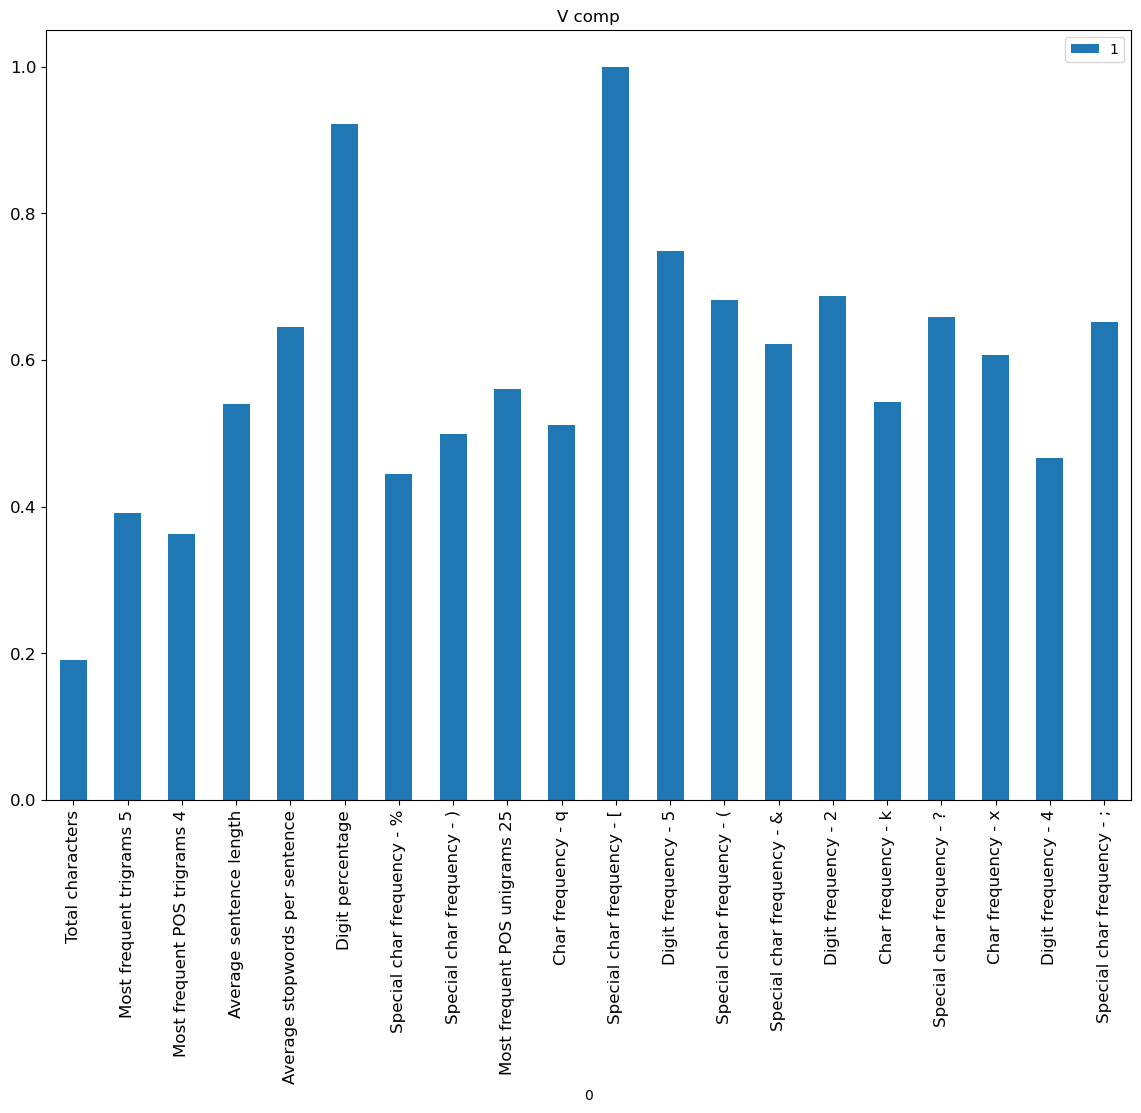

In [14]:
# plt.bar(columns,values)
df.plot(x=0, y=1, kind='bar', title ="V comp", figsize=(14, 10), legend=True, fontsize=12)
# plt.hist(df.transpose()[1])
# df